<ipython-input-1-577564ea3247>:43: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  self.ax = Axes3D(self.fig)                  # Create axes object
<ipython-input-1-577564ea3247>:69: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  a = np.int(n

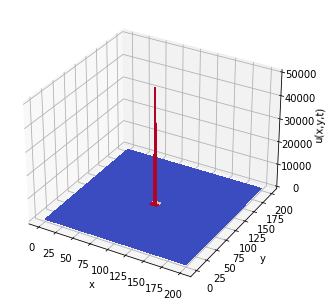

Done!


c:\users\jdumo\appdata\local\programs\python\python39\lib\site-packages\matplotlib\animation.py:973: UserWarning: Animation was deleted without rendering anything. This is most likely unintended. To prevent deletion, assign the Animation to a variable that exists for as long as you need the Animation.
  warnings.warn(


In [1]:
# Filename:  Plot2DHeat.py
# Purpose:   
#

# imports
import      sys
import      matplotlib.pyplot as plt
import      plotly as pl
import      numpy as np
from        mpl_toolkits.mplot3d import axes3d, Axes3D
from        matplotlib.animation import FuncAnimation
import      matplotlib.animation as animation
from        matplotlib import cm
from        matplotlib.ticker import LinearLocator, FormatStrFormatter
import      matplotlib


class HeatOnRectangle():
    def __init__(self, xmax= 100, ymax= 100, tmax=10, dx = 0.1, dy= 0.1, dt=0.01, frames=200, bDebug = False):
        #Global debug
        self.bDebug = bDebug
        
        #Init physical grid for calculation
        self.dt = dt
        self.dx = dx
        self.dy = dy
        self.Tmax = tmax
        self.Xmax = xmax
        self.Ymax = ymax
        self.frames = frames
        
        #self.t = np.arange(0, tmax, 1)
        #self.x = np.arange(0, xmax, xmax+1)
        #self.y = np.arange(0, ymax, ymax+1)        
        self.t = np.linspace(0, tmax, 1)
        self.x = np.linspace(0, xmax, xmax+1)
        self.y = np.linspace(0, ymax, ymax+1)   
        self.u = np.zeros([len(self.x), len(self.y)], float)
        self.uAnimation = np.zeros([len(self.x), len(self.y), self.frames + 1], float)
        
        #init graphical output
        self.fig = plt.figure()                     # Create figure object
        self.ax = Axes3D(self.fig)                  # Create axes object
        self.surf, = plt.plot([], [], [])           # Create empty 3D line object
        self.ax.set_xlabel('x')
        self.ax.set_ylabel('y')
        self.ax.set_zlabel('u(x,y,t)')
        
    # end of __init__
    
    def __str__(self):
        
        print ("u = %d".format(u))    
    
    # end of __str__

    def initSurface(self, x, y):
        '''
            x and y are lists (vectors) that define the length and width of the rectangle
            
            return an array initialized with zero's
        '''
        self.u = np.zeros([len(x), len(y)], float)

        return 

    def applyInitialConditionsAnim(self):
        #find some grid element near the center
        a = np.int(np.floor(len(self.x)/2))
        b = np.int(np.floor(len(self.y)/2))
                
        self.uAnimation[a-1:a+1, b-1:b+2, 0] = 50000.0

        if (self.bDebug == True):
            print (self.uAnimation[a, b, 0])
            print (self.uAnimation)
        
        return 

    def applyInitialConditions(self, u, x, y):
        #find some grid element near the center
        a = np.int(np.floor(len(x)/2))
        b = np.int(np.floor(len(y)/2))
        
        print (a,b)
        u[a-1:a+1, b-1:b+2] = 50000.0

        if (self.bDebug == True):
            print (u[a, b])
            print (u)
        
        return 
        
    def applyBoundaryConditionsAnim(self, t):
        #along the x-axis
        self.uAnimation[:, 0, t] = 0.0
        
        #along the x-axis on the upper-side of the rectangle
        self.uAnimation[:, len(self.y)-1, t] = 0.0
        
        #along the y-axis
        self.uAnimation[0,:,t] = 10000.0
        
        #along the y-axis on the right-side of the rectangle
        self.uAnimation[len(self.x)-1, :, t] = 10000.0

        if (self.bDebug == True):
            print (self.uAnimation)
        
        return

    def applyBoundaryConditions(self, u, x, y):
        #along the x-axis
        u[:, 0] = 0.0
        
        #along the x-axis on the upper-side of the rectangle
        u[:, len(y)-1] = 0.0
        
        #along the y-axis
        u[0,:] = 10000.0
        
        #along the y-axis on the right-side of the rectangle
        u[len(x)-1, :] = 10000.0

        if (self.bDebug == True):
            print (u)
        
        return u
        
    def calcTempNextTimeSegmentAnim(self, t):
        for j in range(1, len(self.x)-1):
            if (self.bDebug == True):
                print ("j = ", j)
            for l in  range(1, len(self.y)-1):
                if (self.bDebug == True):
                    print ("l = ", l)
                self.uAnimation[j,l,t] = (1.0 / 4.0) * (self.uAnimation[j+1,l,t-1] + 
                                            self.uAnimation[j-1,l,t-1] + 
                                            self.uAnimation[j,l+1,t-1] + 
                                            self.uAnimation[j,l-1,t-1]) 

            if (self.bDebug == True):
                print (self.uAnimation)

        return

    def calcTempNextTimeSegment(self, U, x, y):
        u = U.copy()
        for j in range(1, len(x)-1):
            if (self.bDebug == True):
                print ("j = ", j)
            for l in  range(1, len(y)-1):
                if (self.bDebug == True):
                    print ("l = ", l)
                u[j,l] = (1.0 / 4.0) * (u[j+1,l] + u[j-1,l] + u[j,l+1] + u[j,l-1]) 

            if (self.bDebug == True):
                print (u)

        return u

    # initialization function: plot the background of each frame
    def initAnimation(self):
        
        self.surf.set_data([], [], [])           # Create empty 3D line object
        
        return 

    def calcDataAnimation(self, tMax):
    
        for t in range(1, tMax):        
            self.applyBoundaryConditionsAnim(t)
            self.calcTempNextTimeSegmentAnim(t)
        
        return 
    
    def animatePlot(self, nFrames, X, Y, plot):
        plot[0].remove()
        plot[0] = self.ax.plot_surface(X, Y, self.uAnimation[:,:,nFrames], cmap=cm.coolwarm, linewidth=0, antialiased=False)
        
        return
        
# end of class HeatOnRectangle
    
def main():
    '''
        Process to create an animiated graphic using FuncAnimation (from http://www.acme.byu.edu/wp-content/uploads/2018/09/Animation.pdf)
        1. Compute all data to be plotted.
        2. Explicitly define figure object.
        3. Define line objects to be altered dynamically.
        4. Create function to update line objects.
        5. Create FuncAnimation object.
        6. Display using plt.show().
        
        Approach from the following sources:
        https://stackoverflow.com/questions/45712099/updating-z-data-on-a-surface-plot-in-matplotlib-animation
        https://pythonmatplotlibtips.blogspot.com/2018/11/animation-3d-surface-plot-artistanimation-matplotlib.html
    '''
    s = -0.20
    T = 100
    N = 200
    L = 200
    Nx = 10
    Ny = 10
    Nt = 10
    dt = T/Nt
    dx = N/Nx
    dy = L/Ny    
    debug = False
    matplotlib.matplotlib_fname()

    #1. Compute all data to be plotted.
    #2. Explicitly define figure object.
    r = HeatOnRectangle(N, L, T, dx, dy, dt, T, debug)
    r.applyInitialConditionsAnim()
    r.calcDataAnimation(T)
    #print (r.uAnimation)
    
    X, Y = np.meshgrid(r.x,r.y)
    
    # Plot the surface.
    plot = [r.ax.plot_surface(X, Y, r.uAnimation[:,:,0], cmap=cm.coolwarm, linewidth=0, antialiased=False)]
    
    # Add a color bar which maps values to colors.
    #r.fig.colorbar(plot, shrink=0.5, aspect=5)

    # call the animator.  blit=True means only re-draw the parts that have changed.
    ani = animation.FuncAnimation(r.fig, r.animatePlot, T, fargs=(X,Y,plot), interval=100, blit=False)
    
    # save the animation as an mp4.  This requires ffmpeg or mencoder to be
    # installed.  The extra_args ensure that the x264 codec is used, so that
    # the video can be embedded in html5.  You may need to adjust this for
    # your system: for more information, see
    # http://matplotlib.sourceforge.net/api/animation_api.html
    #ani.save('basic_animation.mp4', fps=30)
   
    plt.show()

    return
    
#end of main
 
# *****
# Python entry point
# *****
if __name__ == "__main__":
    main()
    
    print ("Done!")    
